<a href="https://colab.research.google.com/github/inamgithub/Credit_card_fraud_detection/blob/main/Faster_Credit_Card_Fraud_Detection_using_Snap_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection using Scikit-Learn and Snap ML

Here will build two popular classification models to recognize fraudulent credit card transactions.

These models are : 1.Decision Tree
                   2.Support Vector Machine
                   

Here we will use a real dataset to train each of these models. The dataset includes information about transactions made by credit cards in September 2013 by European cardholders. You will use the trained model to assess if a credit card transaction is legitimate or not.

Snap ML is a high-performance IBM library for ML modeling. It provides highly-efficient CPU/GPU implementations of linear models and tree-based models. Snap ML not only accelerates ML algorithms through system awareness, but it also offers novel ML algorithms with best-in-class accuracy.

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlin inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install snapml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 66.7 MB/s eta 0:00:00


## Lets dowonload the dataset

In [ ]:
!pip install opendatasets

import opendatasets as od

od.download("https://www.kaggle.com/mlg-ulb/creditcardfraud")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: inamurrahman003
Your Kaggle Key: ··········


100%|██████████| 66.0M/66.0M [00:00<00:00, 121MB/s]


## Data Analysis

If a transactions belogs to the positive class(1) it is a FRAUD otherwise belogs to negative class(0)

In [ ]:
raw_data = pd.read_csv('creditcardfraud/creditcard.csv')

In [ ]:
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset. ")

There are 284807 observations in the credit card fraud dataset. 


In [ ]:
raw_data.shape

(284807, 31)

In [ ]:
print("There are " + str(len(raw_data.columns)) + " variables in the dataset. ")

There are 31 variables in the dataset. 


Thus, typically you have access to a dataset that is highly unbalanced. This is also the case of the current dataset: only 492 transactions out of 284,807 are fraudulent (the positive class - the frauds - accounts for 0.172% of all transactions).

In [ ]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In practice, a financial institution may have access to a much larger dataset of transactions. To simulate such a case, we will inflate the original one 10 times.

In [ ]:
n_replicas = 10

big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis = 0), columns=raw_data.columns)

In [ ]:
print("There are " + str(len(big_raw_data)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_raw_data.columns)) + " variables in the dataset.")

# display first rows in the new dataset
big_raw_data.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


Each row in the dataset represents a credit card transaction. As shown above, each row has 31 variables. One variable (the last variable in the table above) is called Class and represents the target variable. Your objective will be to train a model that uses the other variables to predict the value of the Class variable. Let's first retrieve basic statistics about the target variable.

Note: For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise

In [ ]:
#get the set of distinct classes
labels = big_raw_data.Class.unique()

# get the count of each class
sizes = big_raw_data.Class.value_counts().values

In [ ]:
print(labels)
print(sizes)

[0. 1.]
[2843150    4920]


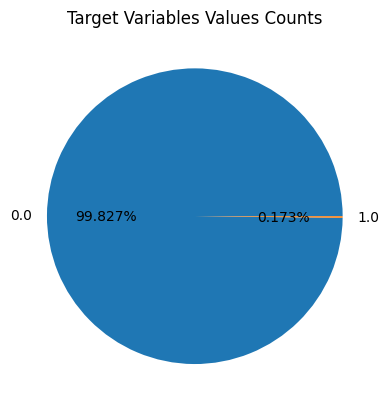

In [ ]:
# plot the class value counts

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variables Values Counts')
plt.show()

As shown above, the Class variable has two values: 0 (the credit card transaction is legitimate) and 1 (the credit card transaction is fraudulent). Thus, you need to model a binary classification problem. Moreover, the dataset is highly unbalanced, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at train time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.

In [ ]:
big_raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

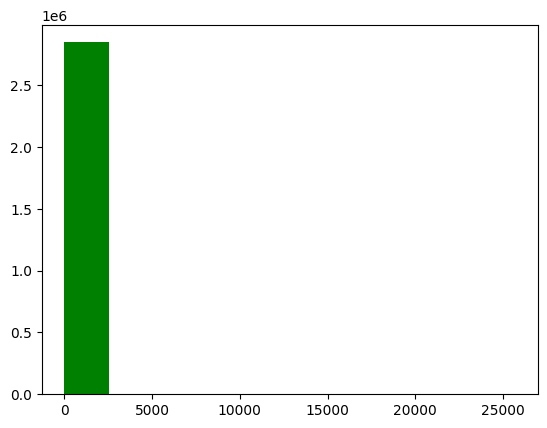

 Minimum amount value is   0.0
 Maximum amount value is   25691.16
 90% of the transactions have an amount less or equal than  1.56081992940724


In [ ]:
# plt.hist(big_raw_data.Amount.values, 6, histtype='bar', facecolor='r')
# plt.show()

plt.hist(big_raw_data.Amount, histtype='bar', facecolor='g')
plt.show()

print(" Minimum amount value is  ", np.min(big_raw_data.Amount.values))
print(" Maximum amount value is  ", np.max(big_raw_data.Amount.values))
print(" 90% of the transactions have an amount less or equal than ", np.percentile(big_raw_data, 90))

## Data Preprocessing

Data preprocessing such an normalization/scaling is useful for linear models to accelerate the trainig convergence

In [ ]:
# standardize features by removing the mean and sccaling to unit variance
big_raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:, 1:30])
data_matrix = big_raw_data.values

In [ ]:
X = data_matrix[:,1:30]

In [ ]:
y = data_matrix[:, 30]

In [ ]:
X = normalize(X, norm='l1')

In [ ]:
X.shape, y.shape

((2848070, 29), (2848070,))

## Dataset Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
X_train.shape, y_train.shape

((1993649, 29), (1993649,))

In [ ]:
X_test.shape, y_test.shape

((854421, 29), (854421,))

## Decision Tree Classifier Model with Scikit - Learn

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
# compute the sample weights to be used as input to the train routine so that
# it takes into account the class imbalance present in this dataset

w_train = compute_sample_weight('balanced', y_train)

In [ ]:
# build model
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

In [ ]:
# train tree
t0 = time.time()
sklearn_dt.fit(X_train,y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Trainig time (s): {0:.5f}".format(sklearn_time))

[Scikit-Learn] Trainig time (s): 29.28795


## Decision Tree Classifier model with Snap *ML*

In [ ]:
# import library
from snapml import DecisionTreeClassifier

# Snap ML offers multi-threaded CPU/GPU training of decision trees, unlike scikit-learn
# to use the GPU, set the use_gpu parameter to True
# snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, use_gpu=True)

# to set the number of CPU threads used at training time, set the n_jobs parameter
# for reproducible output across multiple function calls, set random_state to a given integer value
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)

In [ ]:
# train model

t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
snapml_time = time.time() - t0

print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))


[Snap ML] Training time (s):  5.50894


## Evaluate the Scikit-learn and SnapML Decision Tree Classifier Models

In [ ]:
# Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))


[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 5.32x 


sckit-learn

In [ ]:
# run inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]

In [ ]:
sklearn_pred

array([0.03947781, 0.09088916, 0.03947781, ..., 0.03947781, 0.03947781,
       0.03947781])

In [ ]:
# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

[Scikit-Learn] ROC-AUC score : 0.966


snap ml

In [ ]:
# run inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
snapml_pred = snapml_dt.predict_proba(X_test)[:, 1]

In [ ]:
snapml_pred

array([0.03965165, 0.09108091, 0.03965165, ..., 0.03965165, 0.03965165,
       0.03965165])

In [ ]:
# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the predictions
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Scikit-Learn] ROC-AUC score : 0.966


from the above observation we can see that both models provide same score on the test dataset.

however SnapML russ the traing routine 12x faster than scikit learn.

This is one of the advantages of using Snap ML: acceleration of traing of classical machine learning models such as linear and tree based models

## Build a Support Vector Machine model with scikit-learn

In [ ]:
# import the linear Support Vector Machine (SVM) model from Scikit-Learn
from sklearn.svm import LinearSVC

# instatiate a scikit-learn SVM model
# to indicate the class imbalance at fit time, set class_weight='balanced'
# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# train a linear Support Vector Machine model using Scikit-Learn
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  96.93


## Build a Support Vector Machine Model with Snap ML

In [ ]:
# import the Support Vector Machine model (SVM) from Snap ML
from snapml import SupportVectorMachine

# in contrast to scikit-learn's LinearSVC, Snap ML offers multi-threaded CPU/GPU training of SVMs
# to use the GPU, set the use_gpu parameter to True
# snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, use_gpu=True, fit_intercept=False)

# to set the number of threads used at training time, one needs to set the n_jobs parameter
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
# print(snapml_svm.get_params())

# train an SVM model using Snap ML
t0 = time.time()
model = snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  11.98


## Evaluate the scikit-learn and snapml Support Vector Machine model

In [ ]:
# compute the Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

# run inference using the Scikit-Learn model
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)

# evaluate accuracy on test set
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

# run inference using the Snap ML model
# get the confidence scores for the test samples
snapml_pred = snapml_svm.decision_function(X_test)

# evaluate accuracy on test set
acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 8.09x 
[Scikit-Learn] ROC-AUC score:   0.984
[Snap ML] ROC-AUC score:   0.985


in this section we will evaluate the quality of the SVM models trained above using the hinge loss metric.

In [ ]:
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred = snapml_svm.decision_function(X_test)

In [ ]:
from sklearn.metrics import hinge_loss

In [ ]:
# evaluate the hinge loss from the predictions
loss_snapml = hinge_loss(y_test, snapml_pred)
print("[Snap ML] Hinge loss:   {0:.3f}".format(loss_snapml))


[Snap ML] Hinge loss:   0.228


In [ ]:
loss_sklearn = hinge_loss(y_test, sklearn_pred)
print("[Snap ML] Hinge loss:   {0:.3f}".format(loss_sklearn))


[Snap ML] Hinge loss:   0.234


the two models gave the same hinge loss